##### Import Modules and Load State

In [1]:
import dill
dill.load_session('notebook_env.db')

In [2]:
from captcha.audio import AudioCaptcha
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import obspy.signal.filter as ob
from scipy.io.wavfile import write
import os

##### Training and Testing Model

##### CAPTCHA generator

In [3]:

error_count=0
random_with_N_digits=9876 #Enter Your Number here
audio = AudioCaptcha()
t =str(random_with_N_digits)
audio.write(t,'test_dataset/'+t+'.wav')
sample=str(t)+".wav"
try:
        (fs,x) = read('test_dataset/'+sample)
except ValueError:
        print("Try Again--"+ str(sample))
        error_count +=1
        os.remove('test_dataset/'+sample)


##### Data Visualisation And Graph Plotting

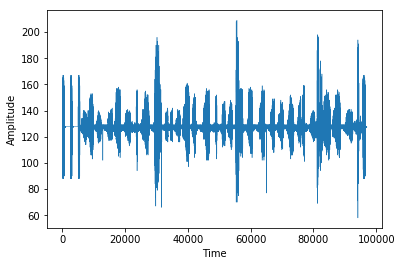

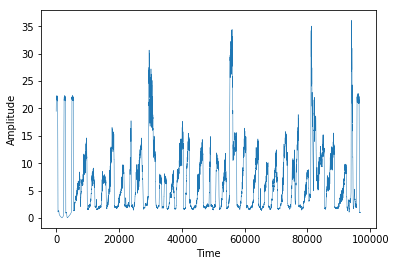

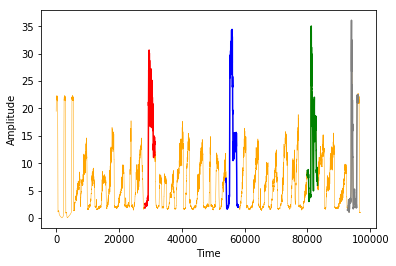

In [4]:
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(x, linewidth=0.5)
plt.show()
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

dir_count=0
y = ob.envelope(x)
envelope = window_rms(y,100)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(envelope, linewidth=0.5)
plt.show()
threshold=25.0

f1= [0,0,0,0,0]
f2= [0,0,0,0,0]
j=0
i=0
   
while i < len(envelope) and j < 4:
        if envelope[i] > threshold:
            f1[j]=i-1200 if i >=1200 else 0
            while envelope[i] > threshold:
                i=i+1
            f2[j]=i+1200
            j=j+1
            i=i+1200
        
        else: 
            i=i+1
            
    
for k in range(4):
    
        gimp = np.asarray(x[f1[k]:f2[k]], dtype=np.int32)
           
        loc = 'test_dataset_seg/'+str(dir_count)+'.wav'
        try:
            m = np.max(np.abs(x[f1[k]:f2[k]]))
        except ValueError:
            continue
        gimp32 = (gimp/m).astype(np.float32)
        write(loc, fs, gimp32 )
        dir_count +=1
y = ob.envelope(x)
envelope = window_rms(y,100)
plt.xlabel("Time")
plt.ylabel("Amplitude")
#print(envelope)
plt.plot(envelope, linewidth=0.5,color="orange") # plotting the envelope
threshold=25.0    
f1= [0,0,0,0,0]
f2= [0,0,0,0,0]
j=0
i=0    
while i < len(envelope) and j < 4:
    if envelope[i] > threshold:
            f1[j]=i-1200 if i >=1200 else 0
            while envelope[i] > threshold:
                i=i+1
                #print(envelope[i])
            f2[j]=i+1900
            i=i+1200
           # print(envelope[f1[j]:f2[j]])
            #plt.plot(envelope[i],color="blue")
            j=j+1
        
    else: 
            i=i+1
dir_count=0
color1=["red","blue","green","grey"]
for k in range(4):
      t=np.arange(f1[k],f2[k],1)
      plt.plot(t,envelope[f1[k]:f2[k]],color=color1[k])

##### Output

In [5]:
print(str(int(aT.fileClassification("test_dataset_seg/0.wav", "svmSMtemp","svm")[0]))
+" "+str(int(aT.fileClassification("test_dataset_seg/1.wav", "svmSMtemp","svm")[0]))
+" "+str(int(aT.fileClassification("test_dataset_seg/2.wav", "svmSMtemp","svm")[0]))
+" "+str(int(aT.fileClassification("test_dataset_seg/3.wav", "svmSMtemp","svm")[0])))

9 8 7 6


##### Save State

In [6]:
import dill
dill.dump_session('notebook_env.db')